In [18]:
df = read.csv("./Walmart_Sales_Updated.csv")

In [19]:
summary(df)
if ( class(df$Date) != "Date" ) {
  df$Date = as.Date(df$Date)
}

       X            Store            Date       Weekly_Sales    
 Min.   :   1   Min.   : 1   2010-02-05:  45   Min.   : 209986  
 1st Qu.:1610   1st Qu.:12   2010-02-12:  45   1st Qu.: 553350  
 Median :3218   Median :23   2010-02-19:  45   Median : 960746  
 Mean   :3218   Mean   :23   2010-02-26:  45   Mean   :1046965  
 3rd Qu.:4826   3rd Qu.:34   2010-03-05:  45   3rd Qu.:1420159  
 Max.   :6435   Max.   :45   2010-03-12:  45   Max.   :3818686  
                             (Other)   :6165                    
  Holiday_Flag      Temperature       Fuel_Price         CPI       
 Min.   :0.00000   Min.   : -2.06   Min.   :2.472   Min.   :126.1  
 1st Qu.:0.00000   1st Qu.: 47.46   1st Qu.:2.933   1st Qu.:131.7  
 Median :0.00000   Median : 62.67   Median :3.445   Median :182.6  
 Mean   :0.06993   Mean   : 60.66   Mean   :3.359   Mean   :171.6  
 3rd Qu.:0.00000   3rd Qu.: 74.94   3rd Qu.:3.735   3rd Qu.:212.7  
 Max.   :1.00000   Max.   :100.14   Max.   :4.468   Max.   :227.2  
    

Exitem duas dimensões principais onde podemos analisar a relação das vendas com os fatores externos disponíveis: Ppara uma mesma loja ou para uma mesma semana.

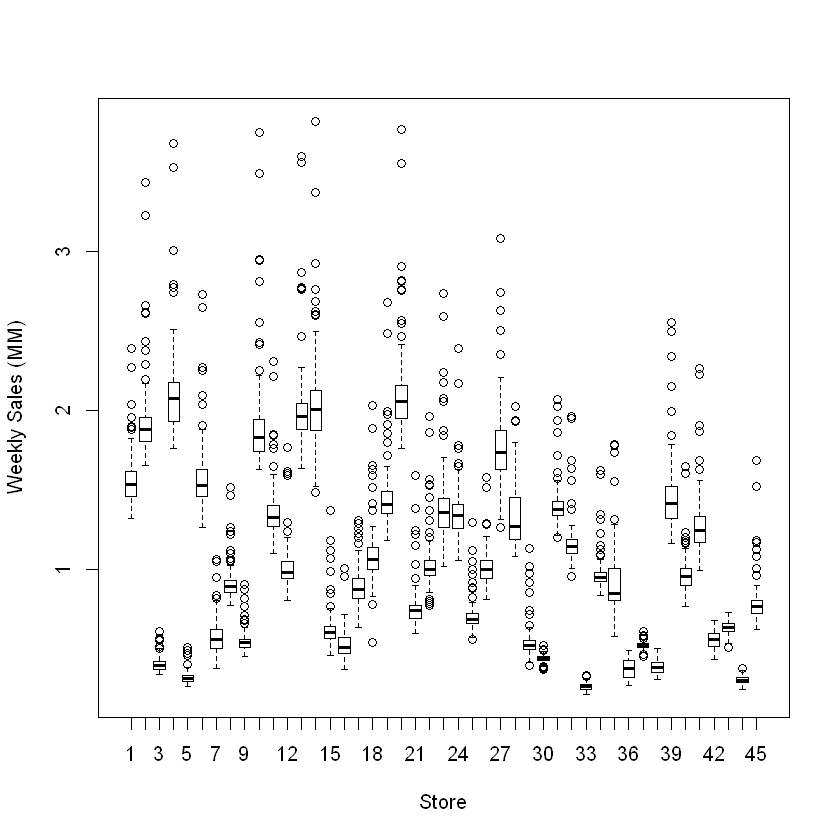

In [20]:
boxplot(Weekly_Sales/1000000 ~ Store, 
        data = df,
        ylab = 'Weekly Sales (MM)'
       )

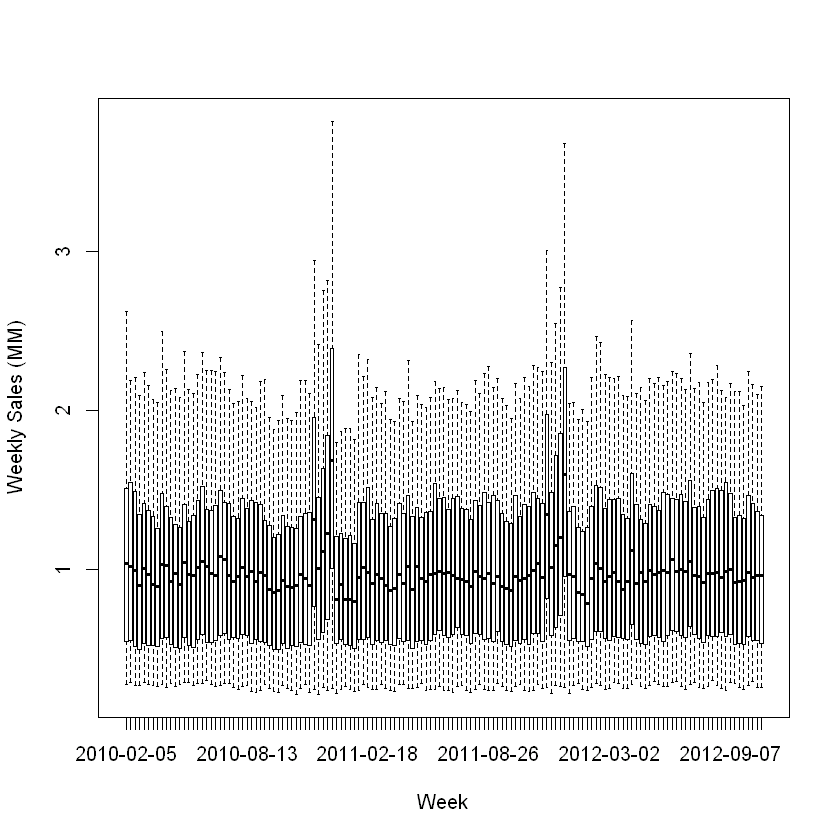

In [21]:
boxplot(Weekly_Sales/1000000 ~ Date,        data = df,
        ylab = 'Weekly Sales (MM)',
        xlab = 'Week'
       )

Pela distribuição de vendas dentro de cada semana e para cada loja ao longo do anos vemos que a variabilidade de resultados é muito maior dentro de uma loja ao longo do tempo. Vamos tomar a loja como a unidade de agrupamento.

Apesar da alta concentração de dados no agrupamento temporal é possível inferir que os picos de venda no tempo ocorrem perto dos feriados de final de ano, notadamente Thanks Giving em novembro e Natal aproximadamente 4 semanas depois. Estes eventos seguidos de um período de 'ressaca' com baixas vendas. 

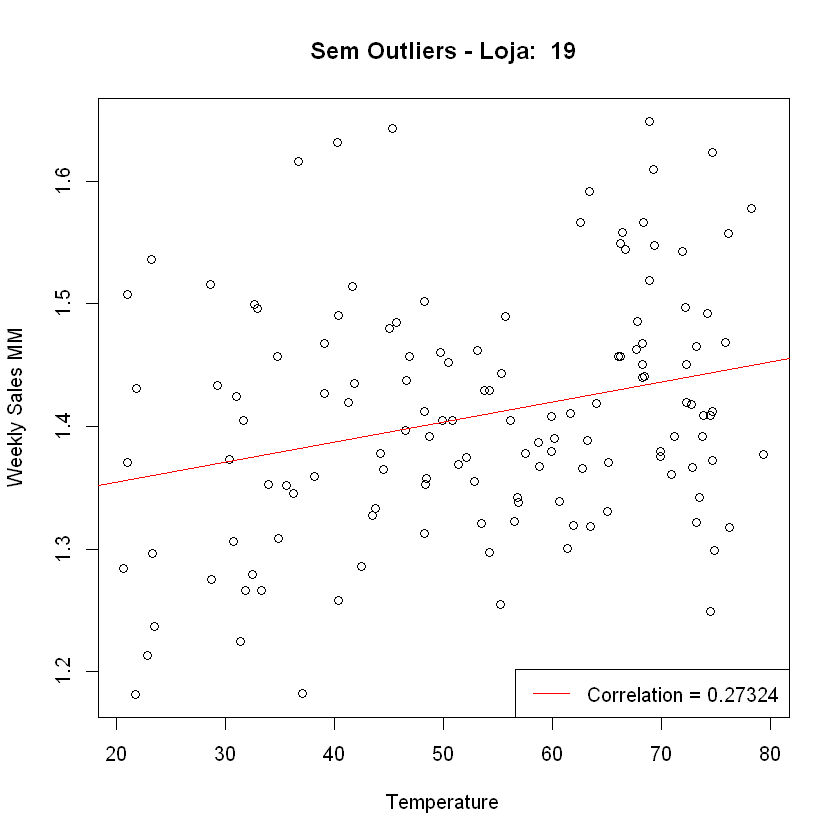

In [24]:
nstore =19

# Calculate Q1, Q3, and IQR
Q1 <- quantile(df[df$Store == nstore,]$Weekly_Sales, 0.25)
Q3 <- quantile(df[df$Store == nstore,]$Weekly_Sales, 0.75)
IQR <- Q3 - Q1

# Define outlier bounds
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

dfplot = df[(df$Store == nstore) & (df$Weekly_Sales > lower_bound) & (df$Weekly_Sales < upper_bound),]

plot(dfplot$Temperature,dfplot$Weekly_Sales/1000000,
    ylab = 'Weekly Sales MM',
    xlab = 'Temperature',
    main = paste( 'Sem Outliers - Loja: ', nstore))
lm_model = lm(dfplot$Weekly_Sales/1000000 ~dfplot$Temperature)
abline(lm_model, col="red")
correlation = cor(dfplot$Temperature,dfplot$Weekly_Sales/1000000)

legend("bottomright", legend=paste("Correlation =", round(correlation, 5)), 
       lty=1, col="red", text.col="black")

text(50, 0.5, "Title", col="green", cex=1.5)

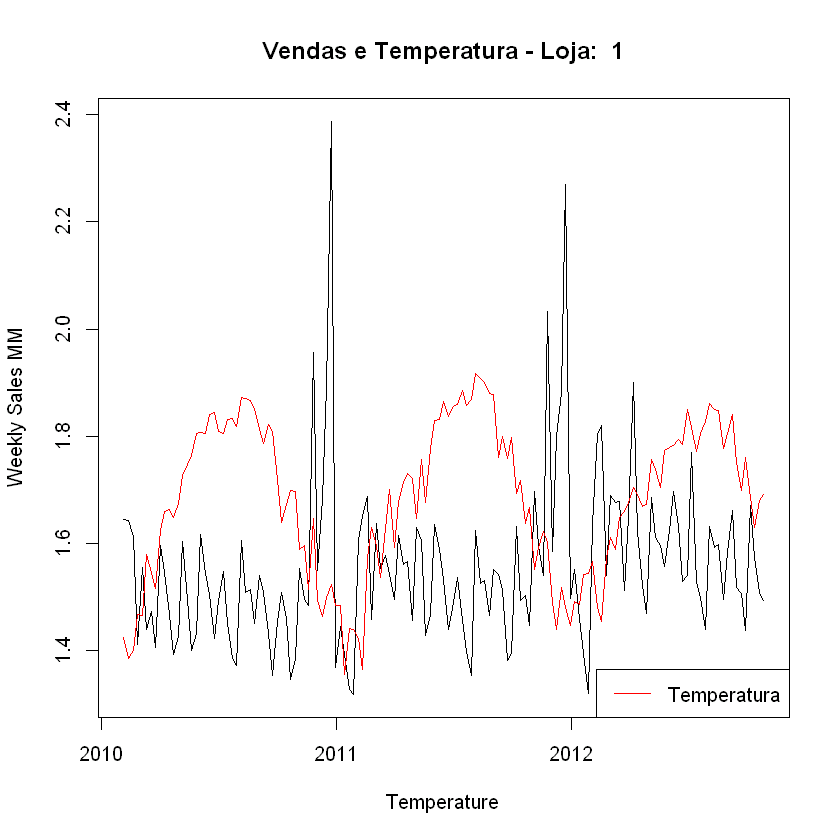

In [25]:
nstore =1

dfplot = df[(df$Store == nstore),]

plot(dfplot$Date,dfplot$Weekly_Sales/1000000,
    type='l',
    ylab = 'Weekly Sales MM',
    xlab = 'Temperature',
    main = paste( 'Vendas e Temperatura - Loja: ', nstore))
lines(dfplot$Date,(dfplot$Temperature/100)+1,
      col = "red")
legend("bottomright", legend="Temperatura", lty=1, col="red", text.col="black")
